In [ ]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 11.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [ ]:
pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.4 MB/s eta 0:00:00


In [ ]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


In [ ]:
pip install --upgrade pytorch-lightning


**NBeat**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import torch
from pytorch_forecasting import NBEATS, NeuralForecast, DistributionLoss


ModuleNotFoundError: No module named 'pytorch_forecasting'

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/LG.csv')

# Tiền xử lý dữ liệu
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
df = df[['ds', 'y']]
df['unique_id'] = 'LG'

print(df)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỉ lệ 80:20
train_size = int(len(df) * 0.8)
Y_train_df = df.iloc[:train_size]
Y_test_df = df.iloc[train_size:]

             ds      y unique_id
0    2019-03-04  71200        LG
1    2019-03-05  71300        LG
2    2019-03-06  74400        LG
3    2019-03-07  75100        LG
4    2019-03-08  73700        LG
...         ...    ...       ...
1502 2024-05-21  96500        LG
1503 2024-05-22  95300        LG
1504 2024-05-23  95400        LG
1505 2024-05-24  94100        LG
1506 2024-05-27  96400        LG

[1507 rows x 3 columns]


In [ ]:
from pytorch_lightning import Trainer
# Cấu hình mô hình N-BEATS
model = NBEATS(h=30, input_size=60,
               loss=DistributionLoss(distribution='Poisson', level=[80, 90]),
               stack_types=['identity', 'trend', 'seasonality'],
               max_steps=100,
               val_check_steps=10,
               early_stop_patience_steps=2)

# Tạo đối tượng NeuralForecast
fcst = NeuralForecast(
    models=[model],
    freq='D'
)

# Huấn luyện mô hình với GPU
fcst.fit(df=Y_train_df, val_size=30)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | DistributionLoss | 5     
1 | padder_train | ConstantPad1d    | 0     
2 | scaler       | TemporalNorm     | 0     
3 | blocks       | ModuleList       | 2.6 M 
--------------------------------------------------
2.6 M     Trainable params
5.5 K     Non-trainable params
2.6 M     Total params
10.287    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Chia dữ liệu test thành các đoạn nhỏ hơn và thực hiện dự đoán
window_size = 30
num_rows = len(Y_test_df)
all_predictions = []

for i in range(0, num_rows, window_size):
    # Lấy ra window_size dữ liệu tiếp theo
    window = Y_test_df.iloc[i:i+window_size]

    # Nếu cửa sổ có ít hơn window_size hàng, dừng lại
    if len(window) < window_size:
        break

    # Thực hiện dự đoán cho window
    predictions = fcst.predict(df=window)

    # Thêm dự đoán vào danh sách
    all_predictions.append(predictions)

# Gộp tất cả các dự đoán lại thành một DataFrame
final_predictions = pd.concat(all_predictions).reset_index(drop=True)

# Đảm bảo rằng final_predictions có đúng 603 dòng dữ liệu
print(final_predictions.shape)  # Kết quả nên là (603, số cột)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

(300, 7)


/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
# Đánh giá các chỉ số MAPE, MSE, RMSE cho tập kiểm tra
test_data = Y_test_df['y'].values
predict_data = final_predictions['NBEATS-median'].values

mape_test = mean_absolute_percentage_error(test_data[:len(predict_data)], predict_data)
mse_test = mean_squared_error(test_data[:len(predict_data)], predict_data)
rmse_test = np.sqrt(mse_test)

In [ ]:
print(f'Test Data - MAPE: {mape_test*100:.2f}%, MSE: {mse_test}, RMSE: {rmse_test}')


Test Data - MAPE: 6.01%, MSE: 73071086.86583333, RMSE: 8548.162777219051


In [ ]:
# Dự báo giá cổ phiếu cho 30 ngày tiếp theo
future_dates = pd.date_range(start=Y_train_df['ds'].max() + pd.Timedelta(days=1), periods=30, freq='D')
futr_df = pd.DataFrame({'ds': future_dates, 'unique_id': 'LG'})
forecasts = fcst.predict(futr_df=futr_df)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


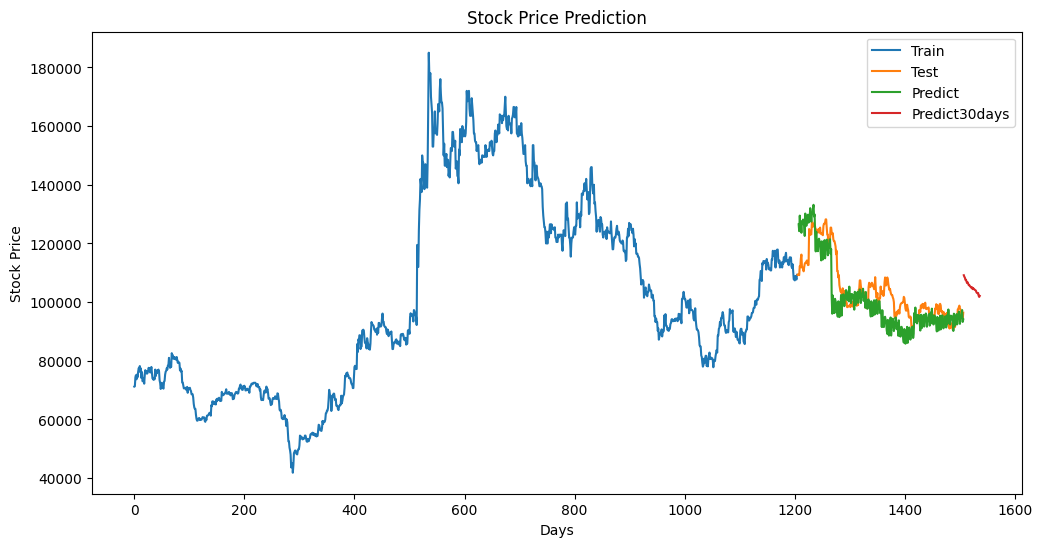

In [ ]:
# Tạo DataFrame chứa các giá trị 'Train', 'Test', 'Predict', và 'Predict30days'
train_data = Y_train_df['y'].values
test_data = Y_test_df['y'].values
predict_data = final_predictions['NBEATS-median']

# Tạo mảng chứa các chỉ số ngày
index_train = np.arange(len(train_data))
index_test = np.arange(len(train_data), len(train_data) + len(test_data))
index_predict = np.arange(len(train_data) + len(test_data) - len(final_predictions), len(train_data) + len(test_data))
index_predict_30_days = np.arange(len(df), len(df) + 30)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(index_train, train_data, label='Train')
plt.plot(index_test, test_data, label='Test')
plt.plot(index_predict, predict_data, label='Predict')
plt.plot(index_predict_30_days, forecasts['NBEATS-median'].tail(30), label='Predict30days')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
# Dự báo giá cổ phiếu cho 60 ngày tiếp theo
future_dates_60 = pd.date_range(start=Y_train_df['ds'].max() + pd.Timedelta(days=1), periods=60, freq='D')
futr_df_60 = pd.DataFrame({'ds': future_dates_60, 'unique_id': 'LG'})
forecasts_60 = fcst.predict(futr_df=futr_df_60)

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:758: UserWarning: Dropped 30 unused rows from `futr_df`.
  warnings.warn(f"Dropped {dropped_rows:,} unused rows from `futr_df`.")
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


HUẤN LUYỆN MÔ HÌNH CHO 60 NGÀY


In [ ]:
# Cấu hình mô hình N-BEATS cho 60 ngày
model_60 = NBEATS(h=60, input_size=60,
                  loss=DistributionLoss(distribution='Poisson', level=[80, 90]),
                  stack_types=['identity', 'trend', 'seasonality'],
                  max_steps=100,
                  val_check_steps=10,
                  early_stop_patience_steps=2)

# Tạo đối tượng NeuralForecast cho mô hình mới
fcst_60 = NeuralForecast(
    models=[model_60],
    freq='D'
)


INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
# Huấn luyện mô hình cho 60 ngày
fcst_60.fit(df=Y_train_df, val_size=60)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | DistributionLoss | 5     
1 | padder_train | ConstantPad1d    | 0     
2 | scaler       | TemporalNorm     | 0     
3 | blocks       | ModuleList       | 2.7 M 
--------------------------------------------------
2.6 M     Trainable params
14.5 K    Non-trainable params
2.7 M     Total params
10.631    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Dự báo giá cổ phiếu cho 60 ngày tiếp theo
future_dates_60 = pd.date_range(start=Y_train_df['ds'].max() + pd.Timedelta(days=1), periods=60, freq='D')
futr_df_60 = pd.DataFrame({'ds': future_dates_60, 'unique_id': 'LG'})
forecasts_60 = fcst_60.predict(futr_df=futr_df_60)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
print (forecasts_60.shape)

(60, 7)


In [ ]:
# Tạo DataFrame chứa các giá trị 'Train', 'Test', 'Predict', 'Predict30days', và 'Predict60days' của mô hình mới
predict_data_60 = forecasts_60['NBEATS-median']

In [ ]:
# Tạo mảng chứa các chỉ số ngày cho dự đoán 60 ngày
index_predict_60_days = np.arange(len(df), len(df) + 60)

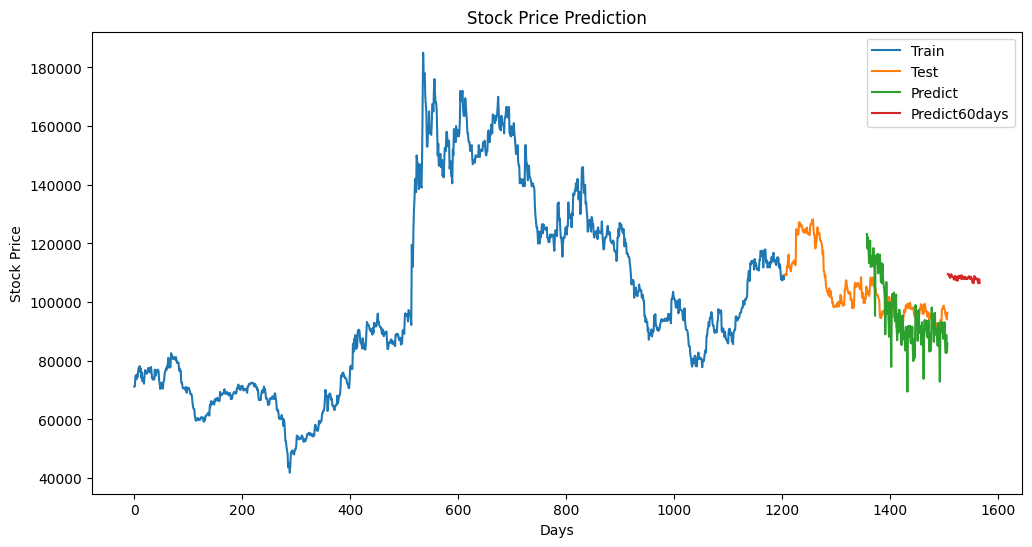

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(index_train, train_data, label='Train')
plt.plot(index_test, test_data, label='Test')
plt.plot(index_predict, predict_data, label='Predict')

plt.plot(index_predict_60_days, predict_data_60, label='Predict60days')  # Thêm dữ liệu dự đoán từ mô hình mới
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

HUẤN LUYỆN MÔ HÌNH CHO 90 NGÀY


In [ ]:
# Cấu hình mô hình N-BEATS cho 90 ngày
model_90 = NBEATS(h=90, input_size=60,
                  loss=DistributionLoss(distribution='Poisson', level=[80, 90]),
                  stack_types=['identity', 'trend', 'seasonality'],
                  max_steps=100,
                  val_check_steps=10,
                  early_stop_patience_steps=2)

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
# Tạo đối tượng NeuralForecast cho mô hình mới
fcst_90 = NeuralForecast(
    models=[model_90],
    freq='D'
)


In [ ]:
# Huấn luyện mô hình cho 90 ngày
fcst_90.fit(df=Y_train_df, val_size=90)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type             | Params
--------------------------------------------------
0 | loss         | DistributionLoss | 5     
1 | padder_train | ConstantPad1d    | 0     
2 | scaler       | TemporalNorm     | 0     
3 | blocks       | ModuleList       | 2.7 M 
--------------------------------------------------
2.7 M     Trainable params
27.2 K    Non-trainable params
2.7 M     Total params
10.990    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Dự báo giá cổ phiếu cho 90 ngày tiếp theo
future_dates_90 = pd.date_range(start=Y_train_df['ds'].max() + pd.Timedelta(days=1), periods=90, freq='D')
futr_df_90 = pd.DataFrame({'ds': future_dates_90, 'unique_id': 'LG'})
forecasts_90 = fcst_90.predict(futr_df=futr_df_90)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:

# Tạo DataFrame chứa các giá trị 'Predict90days' của mô hình mới
predict_data_90 = forecasts_90['NBEATS-median']


In [ ]:
# Tạo mảng chứa các chỉ số ngày cho dự đoán 90 ngày
index_predict_90_days = np.arange(len(df), len(df) + 90)

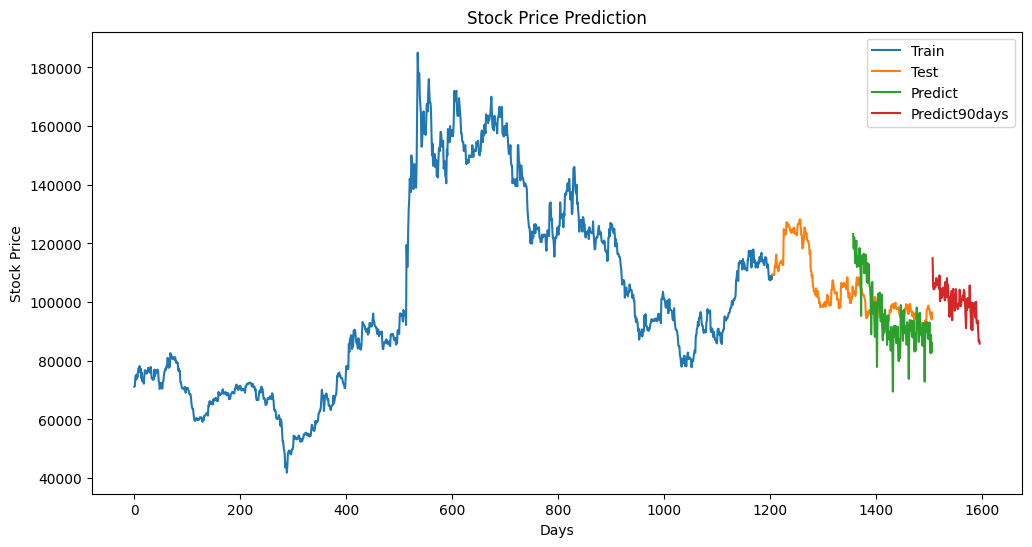

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(index_train, train_data, label='Train')
plt.plot(index_test, test_data, label='Test')
plt.plot(index_predict, predict_data, label='Predict')

plt.plot(index_predict_90_days, predict_data_90, label='Predict90days')  # Thêm dữ liệu dự đoán từ mô hình mới
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()